In [149]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import scipy.stats as stats

In [150]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [151]:
df = pd.read_csv('data/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [152]:
df.shape

(1030, 9)

In [153]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [154]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [155]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [157]:
pred_stats = []

In [158]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
pred_stats.append(r2_score(y_test, y_pred))

print("R^2 score with NO REGULARIZATION : " ,pred_stats[0])

R^2 score with NO REGULARIZATION :  0.6275531792314848


In [159]:
pred_stats.append(np.mean(cross_val_score(lr,x,y,scoring='r2')))
print("R^2 score for cross validation with NO REGULARIZATION : " , pred_stats[1])

R^2 score for cross validation with NO REGULARIZATION :  0.46099404916628683


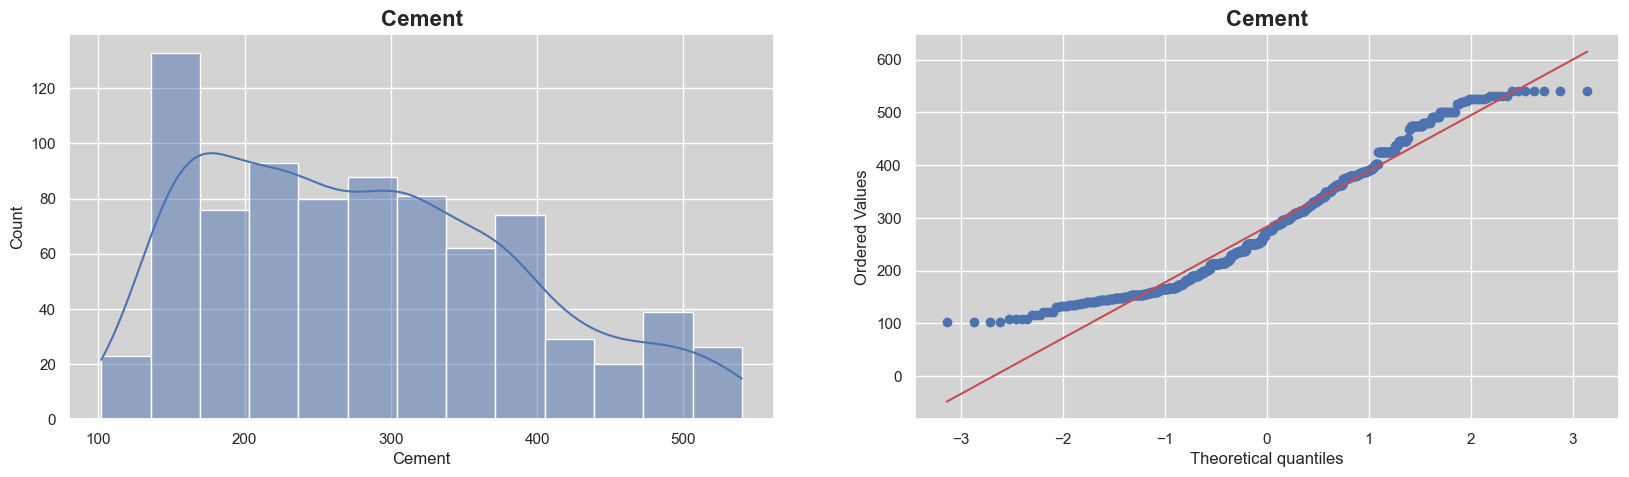

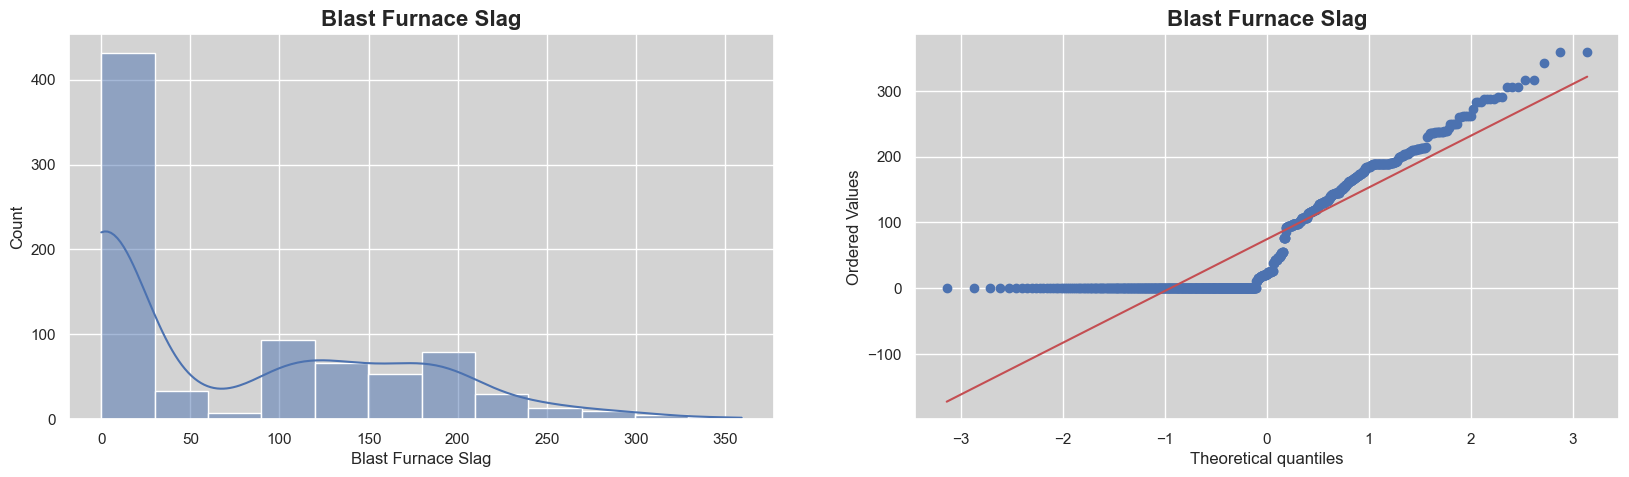

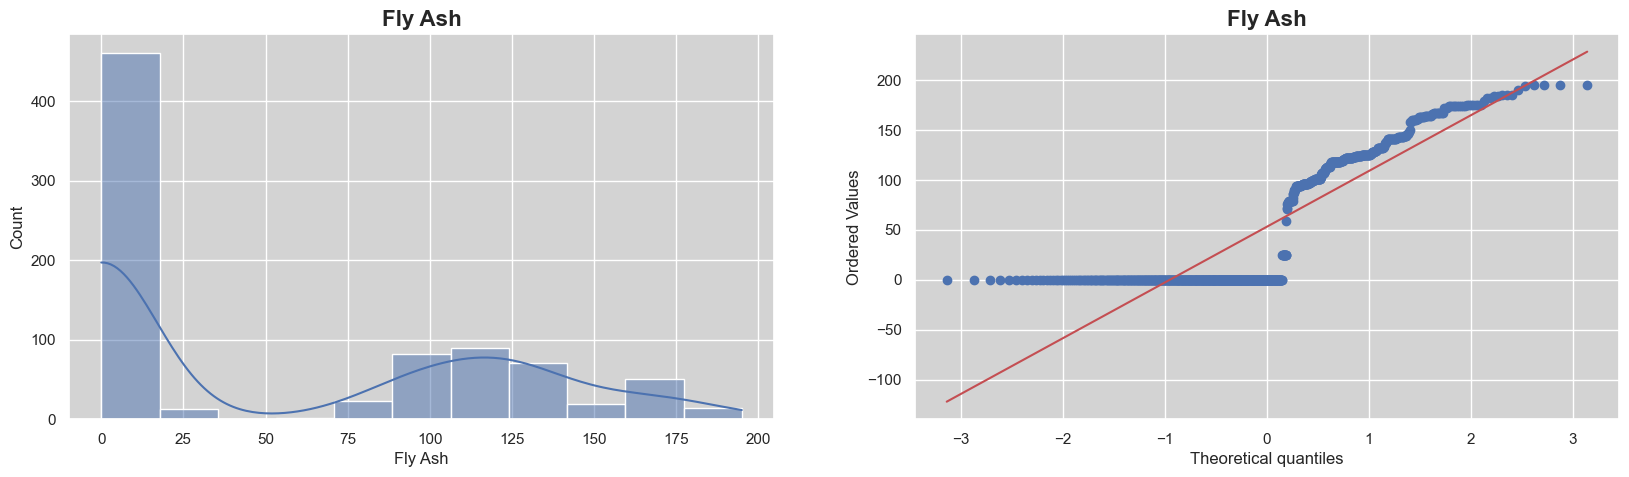

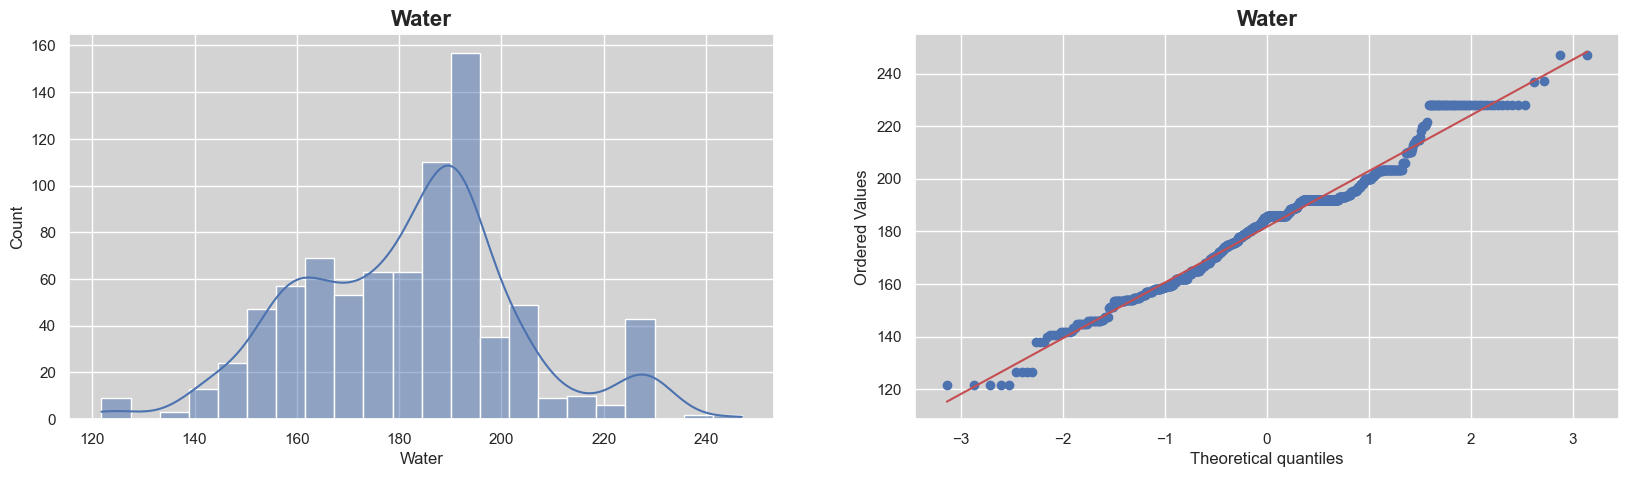

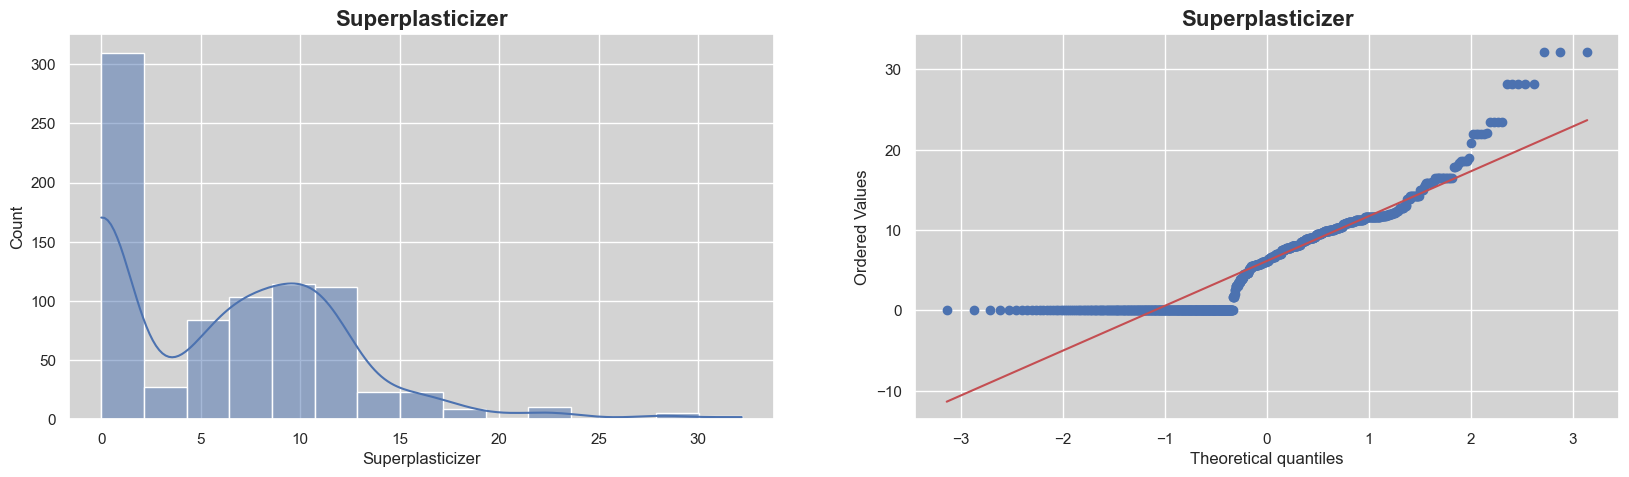

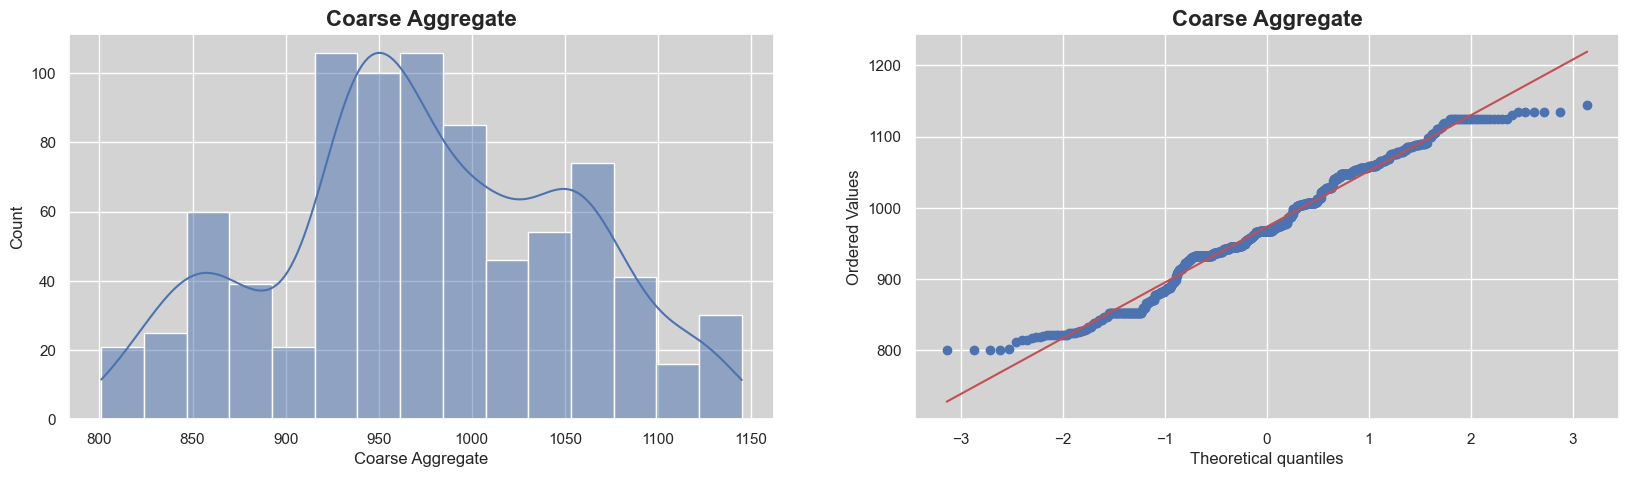

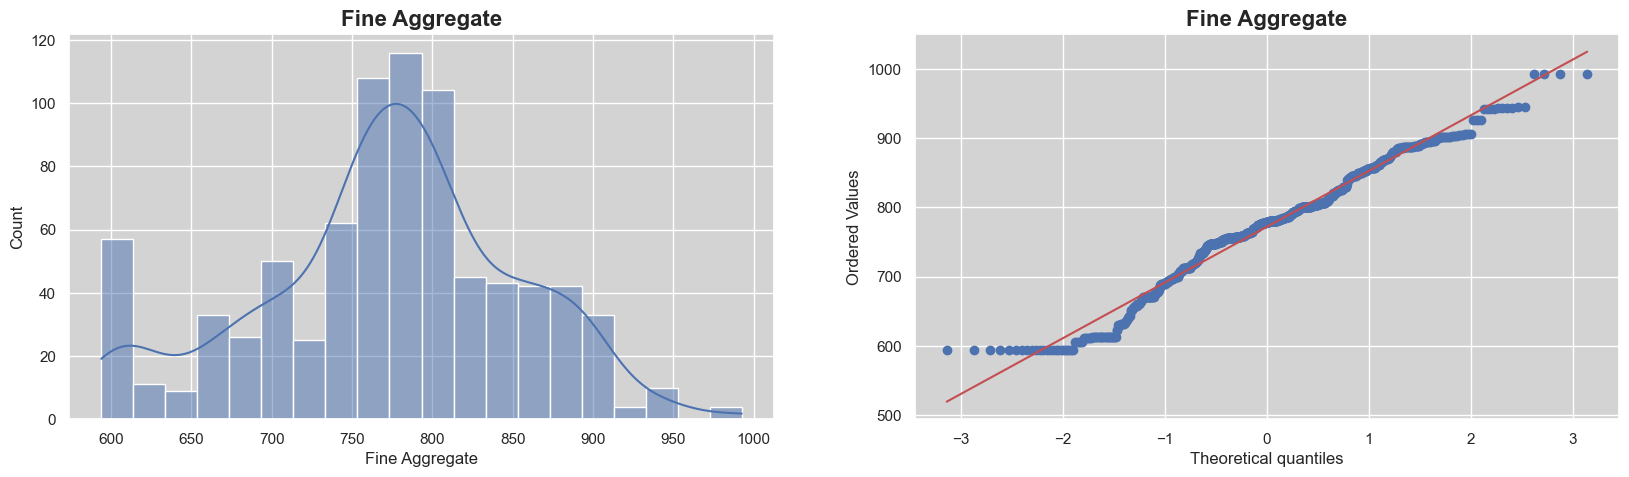

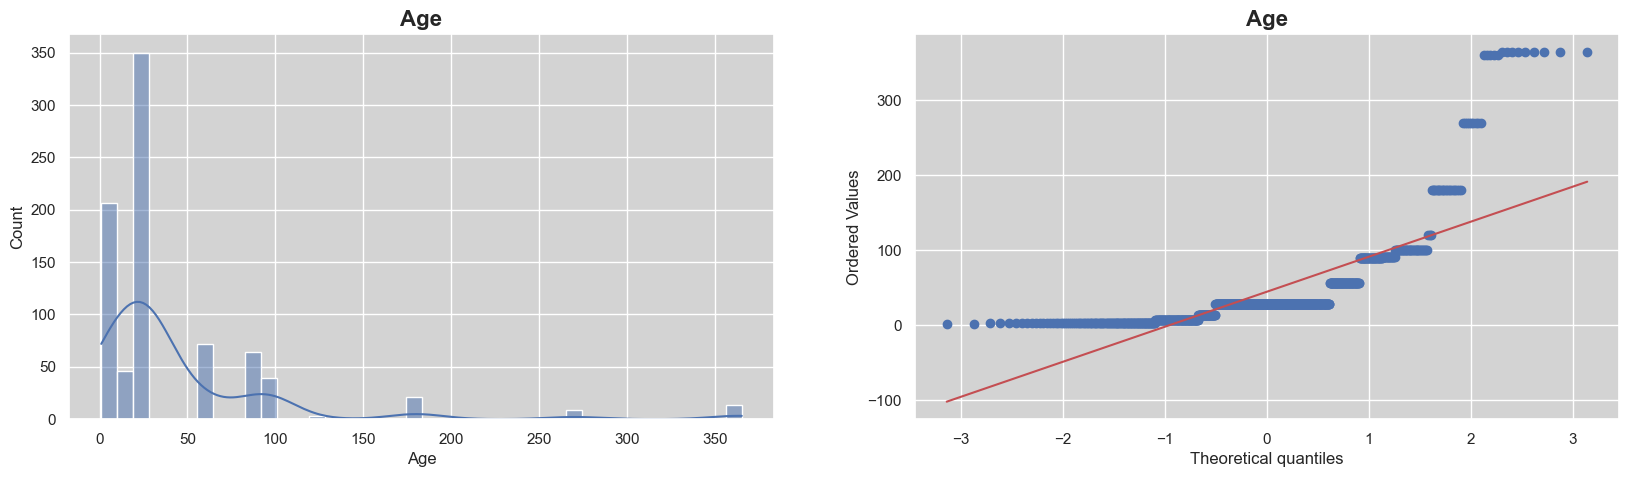

In [160]:
sns.set_style('darkgrid')
plt.rcParams['axes.facecolor'] = 'lightgray'

for col in x_train.columns:
    plt.figure(figsize=(20,5))
    
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(x_train[col], dist='norm', plot=plt)
    plt.title(col)
    plt.grid(True)
    
    plt.show()

##### Observation :

The following features deviate from the normal distribution based on the above plots

1) Blast Furnace Slag

2) Age

3) Fly Ash 

4) Superplasticizer

---

### 📦 Box-Cox Transformation

Box-Cox transformation is a **statistical technique** used to transform a non-normal dependent variable into a **normal distribution** shape. 🧮


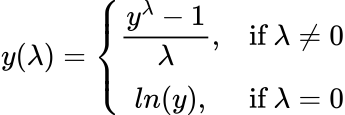

#### How It Works:
- Takes the **natural log** of a variable.
- Raises it to a power (**lambda**) determined by the **maximum likelihood estimator**.

#### 🛠️ When to Use:
This transformation is ideal when working with models that require features to follow a **normal distribution**, such as:
- **Linear Regression**
- **Logistic Regression**

#### ⚠️ Important:
- Box-Cox transformation **does not work** for values ≤ 0. 🚫
- To handle this, we add a small value (e.g., `0.000001`) to the dataset to ensure all values are positive. ✅

In [161]:
pt = PowerTransformer(method='box-cox')

xTrain_BoxCox_Tran = pt.fit_transform(x_train + 0.000001)
xTest_BoxCox_Tran = pt.fit_transform(x_test + 0.000001)

pd.DataFrame({'cols': x_train.columns, 'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


```plaintext
The above calculated lambda value for each cols will be applied to the dataframe
```

In [162]:
lr = LinearRegression()
lr.fit(xTrain_BoxCox_Tran, y_train)

y_pred = lr.predict(xTest_BoxCox_Tran)
pred_stats.append(r2_score(y_test, y_pred))

print("R^2 score after applying BOX-COX TRANSFORMATION : ", pred_stats[2])

R^2 score after applying BOX-COX TRANSFORMATION :  0.8055321004700796


In [163]:
pt = PowerTransformer(method='box-cox')
x_transform= pt.fit_transform(x + 0.0000001)

lr = LinearRegression()
pred_stats.append(np.mean(cross_val_score(lr, x_transform, y, scoring='r2')))

print("R^2 value on CROSS VALIDATION applying BOX_COX TRANSFORMATION " , pred_stats[3])

R^2 value on CROSS VALIDATION applying BOX_COX TRANSFORMATION  0.6658537926845632


In [173]:
x_train_trandform = pd.DataFrame(x_transform,columns=x_train.columns)

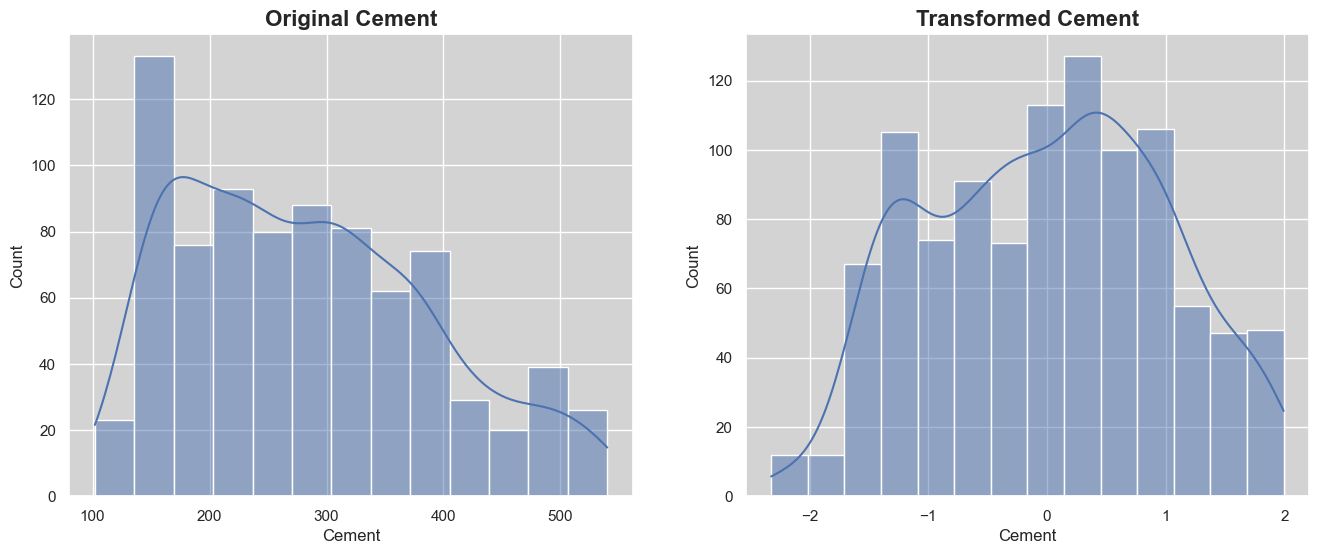

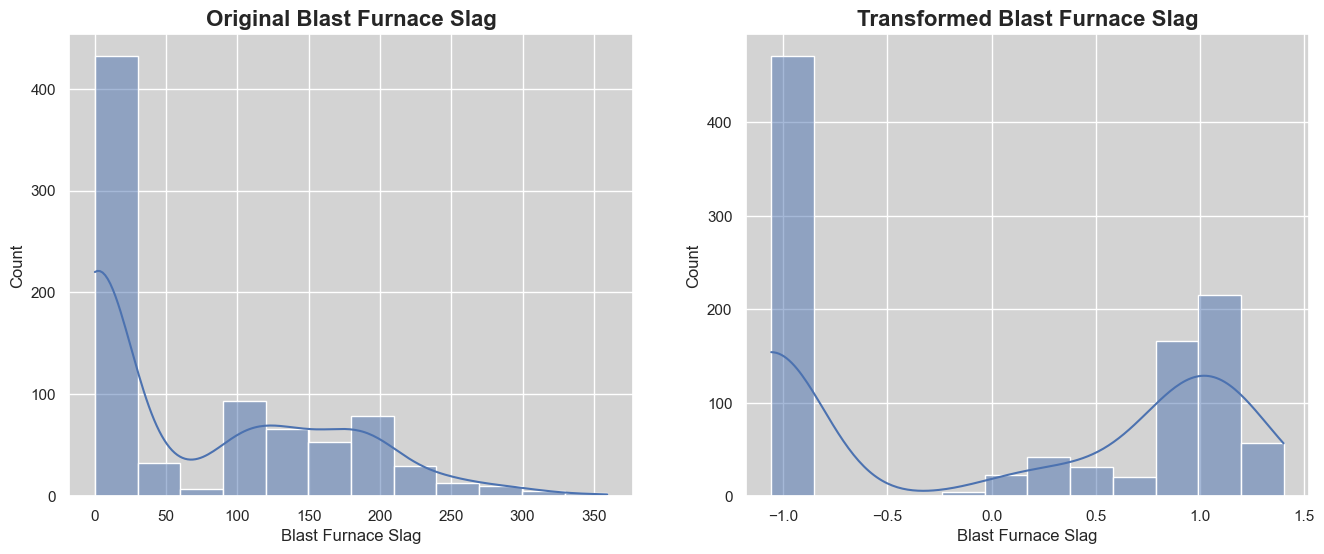

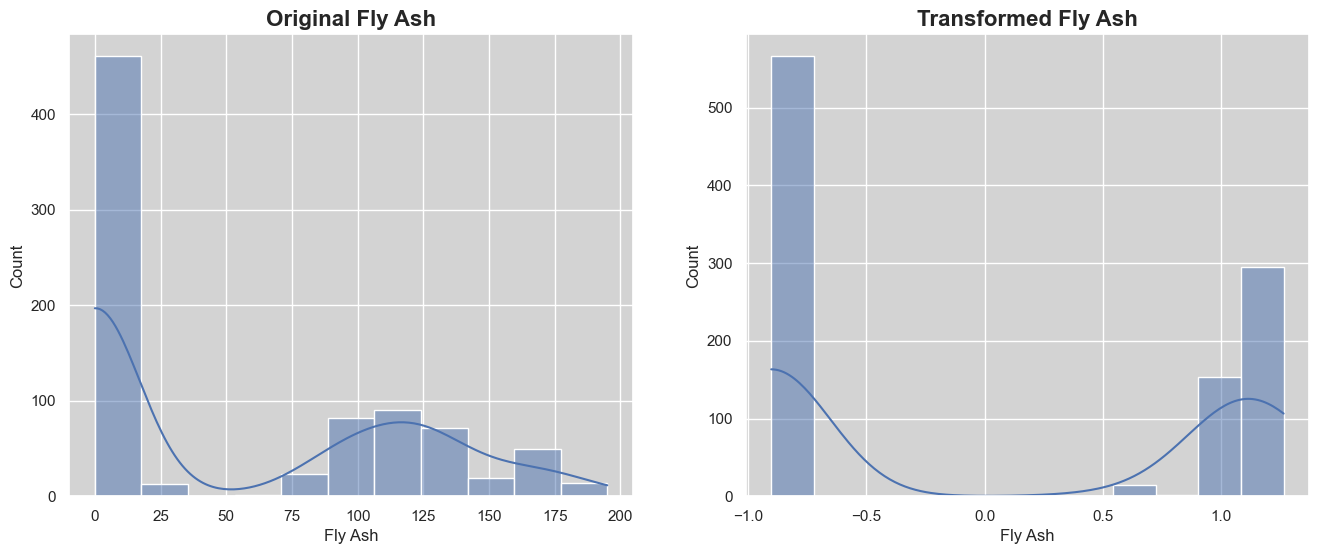

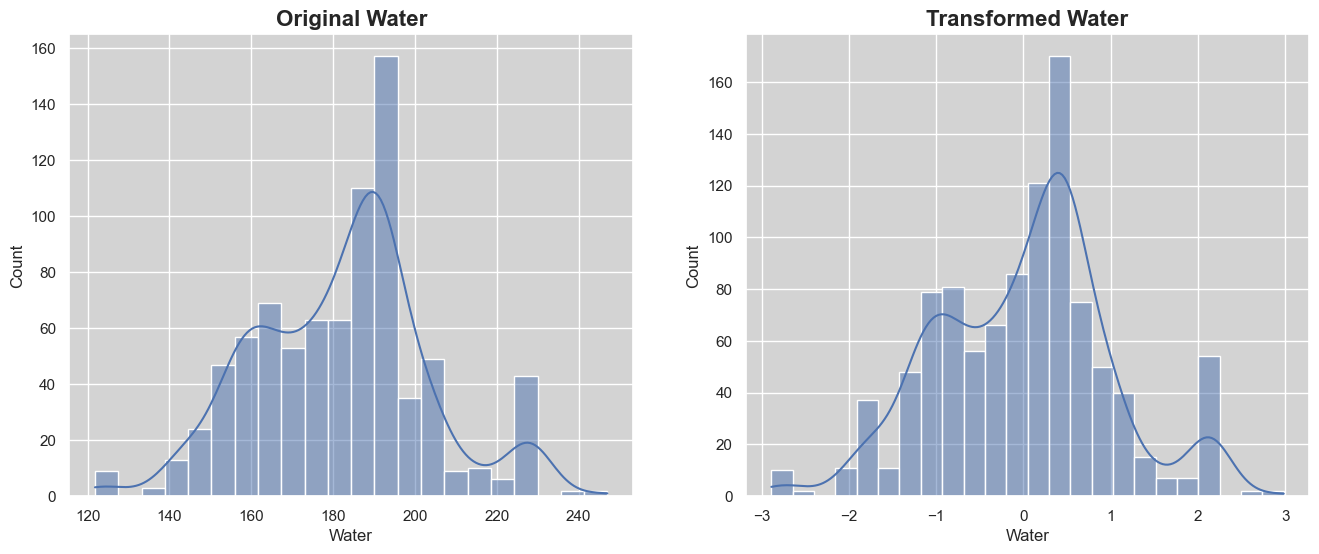

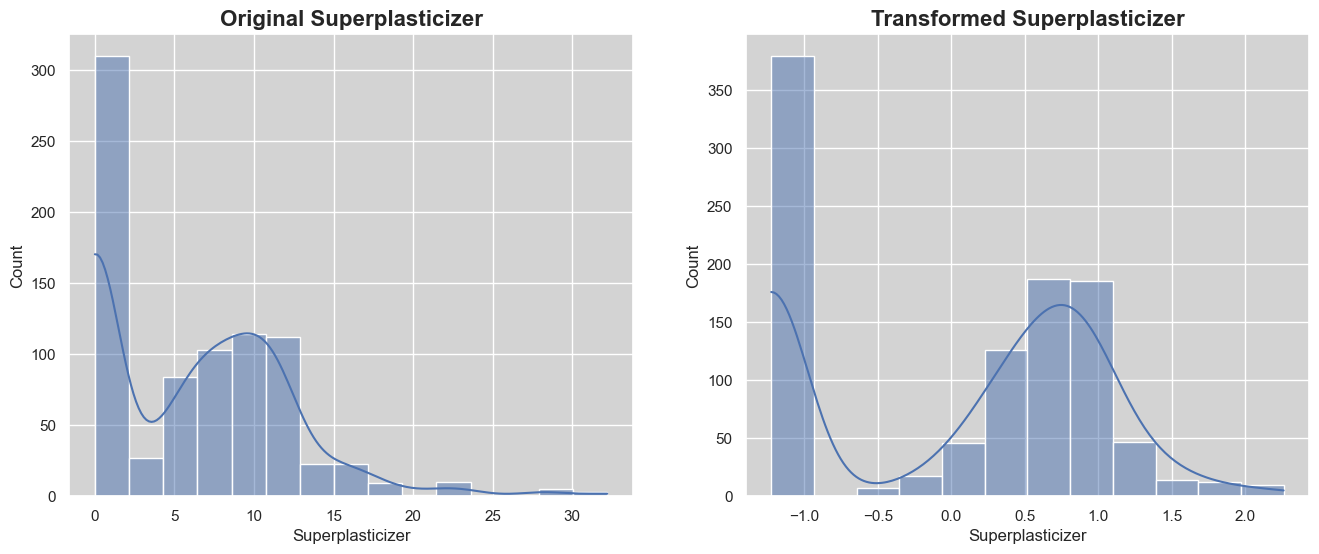

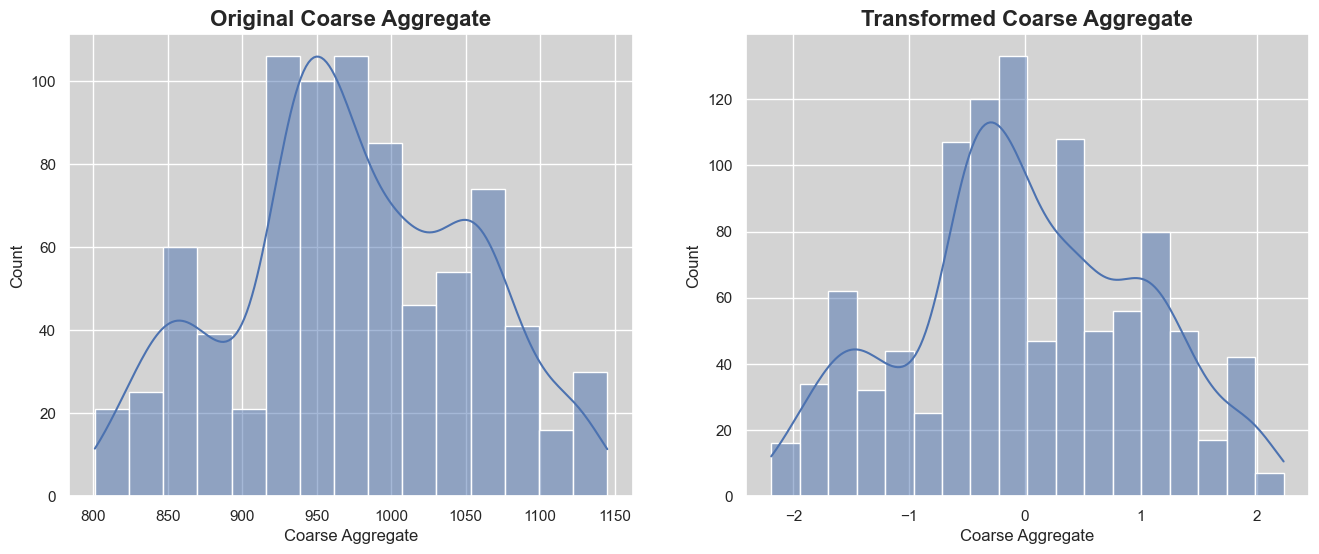

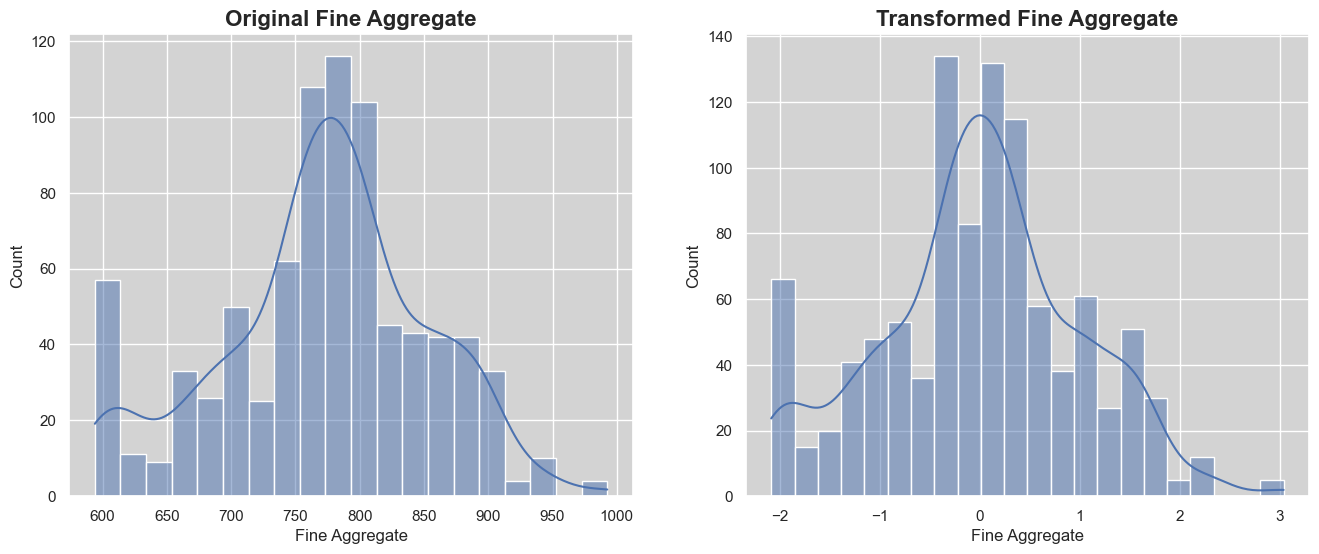

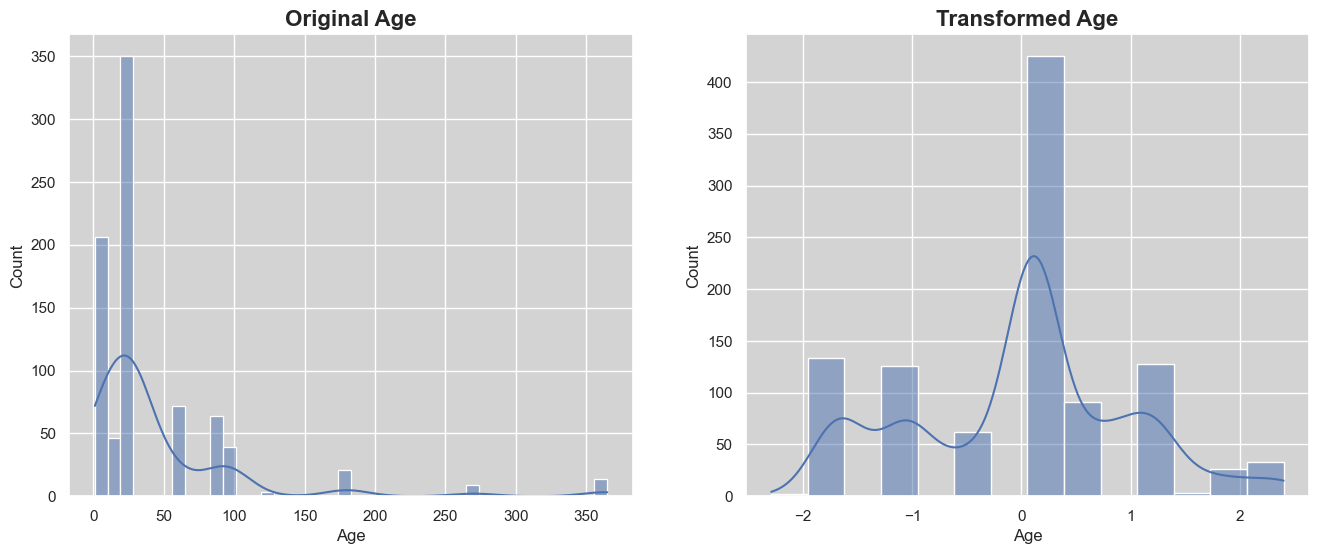

In [178]:
sns.set_style('darkgrid')
plt.rcParams['axes.facecolor'] = 'lightgray'

for col in x_train.columns:
    plt.figure(figsize=(16, 6))
    
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(f'Original {col}')
    plt.grid(True)
    
    plt.subplot(122)
    sns.histplot(x_train_transform[col], kde=True)
    plt.title(f'Transformed {col}')
    plt.grid(True)
    
    plt.show()

**Observation**:
- Yeo-Johnson normalization performed slightly better than Box-Cox in terms of results. 📈
- Features like **Age** and **Super Plasticizer** showed clear transformations from non-normal to normal distributions. 📊


---
#### Applying Yeo-Johnson Transformation 

Unlike Box-Cox Yeo-Johnson can handle datasets with both +ve and -ve values. It adapts its transformation based on the sign of the data

Similar to Box-COX Yeo-Johnson transformation searches for the optimal lambda value that maximizes the normality of the transformed data. 

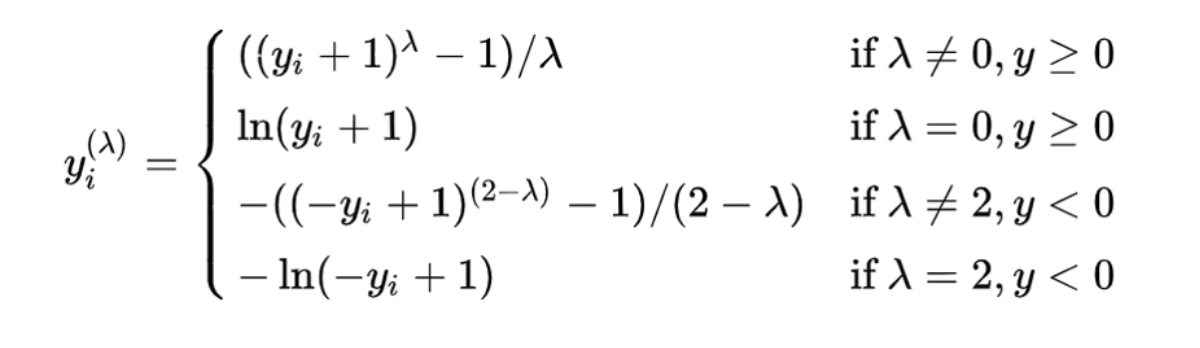

In [165]:
pt1 = PowerTransformer()

xTrain_YroJohn_tran = pt1.fit_transform(x_train)
xTest_YroJohn_tran = pt1.transform(x_test)

pd.DataFrame({'cols' : x_train.columns, 'Yeo Johnson lambdas' : pt1.lambdas_})

,cols,Yeo Johnson lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [166]:
lr = LinearRegression()                # it is yeo johnson by default
lr.fit(xTrain_YroJohn_tran, y_train) 

y_pred = lr.predict(xTest_YroJohn_tran)
pred_stats.append(r2_score(y_test, y_pred))

print("R^2 score with YEO JOHNSON TRANSFORMATION : ", pred_stats[4])

R^2 score with YEO JOHNSON TRANSFORMATION :  0.8161906513354854


In [167]:
# applying cross vali score 
pt = PowerTransformer()
x_YeoJohn_tran = pt.fit_transform(x)

lr = LinearRegression()
pred_stats.append(np.mean(cross_val_score(lr, x_YeoJohn_tran, y, scoring='r2')))

print('R^2 value for YEO JOHNSON TRANSFORMATION : ', pred_stats[5])

R^2 value for YEO JOHNSON TRANSFORMATION :  0.6834625141500866


In [168]:
x_train_transform = pd.DataFrame(x_YeoJohn_tran, columns=x_train.columns)

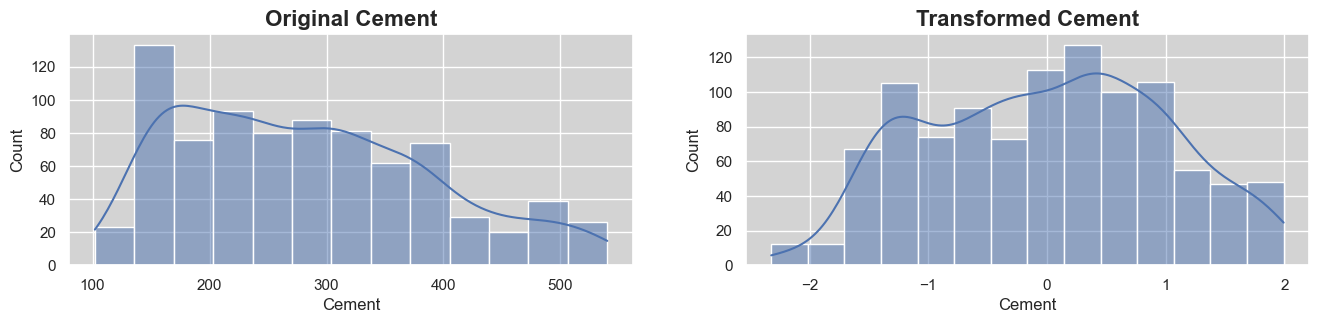

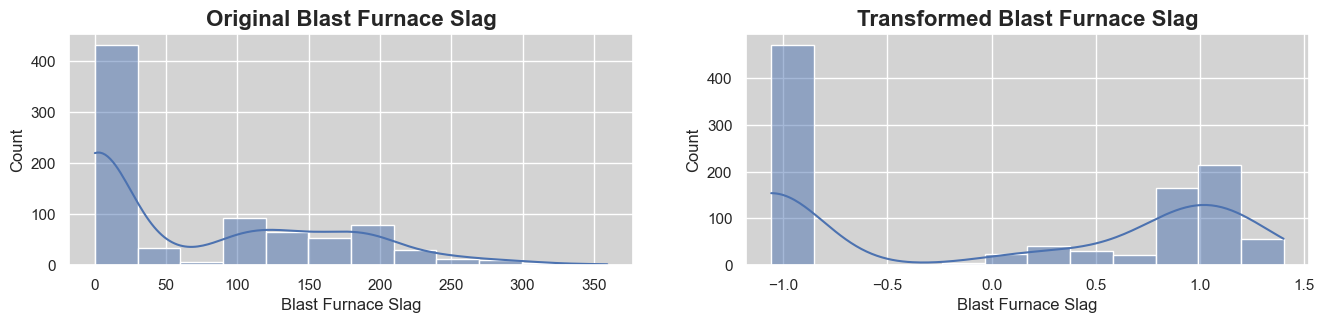

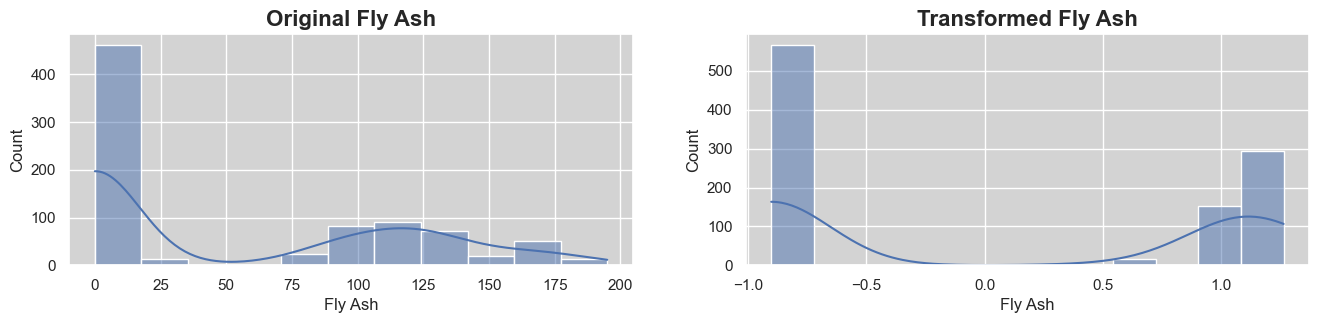

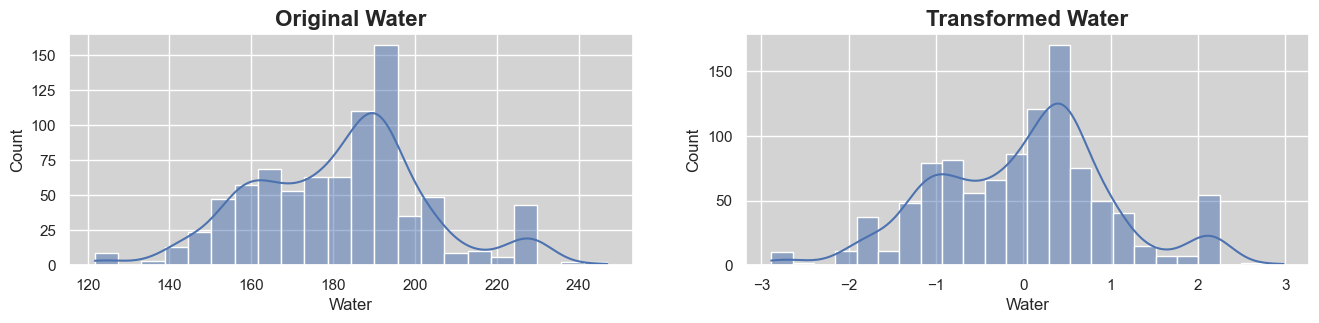

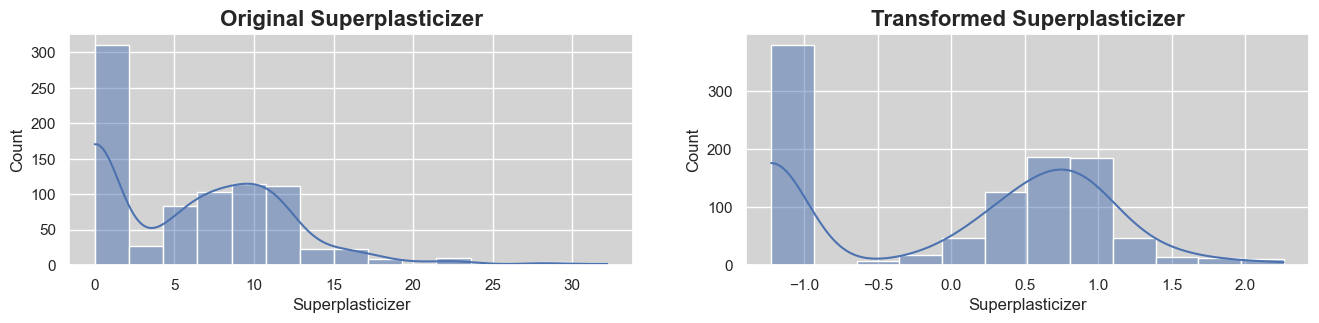

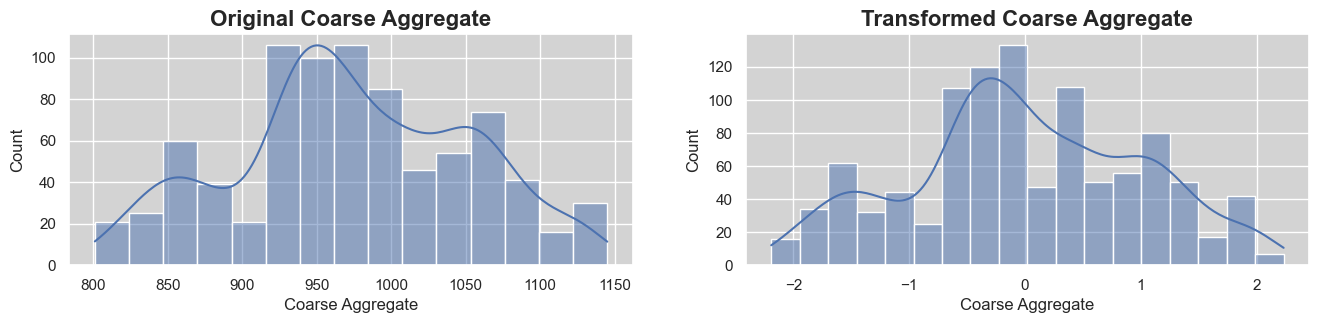

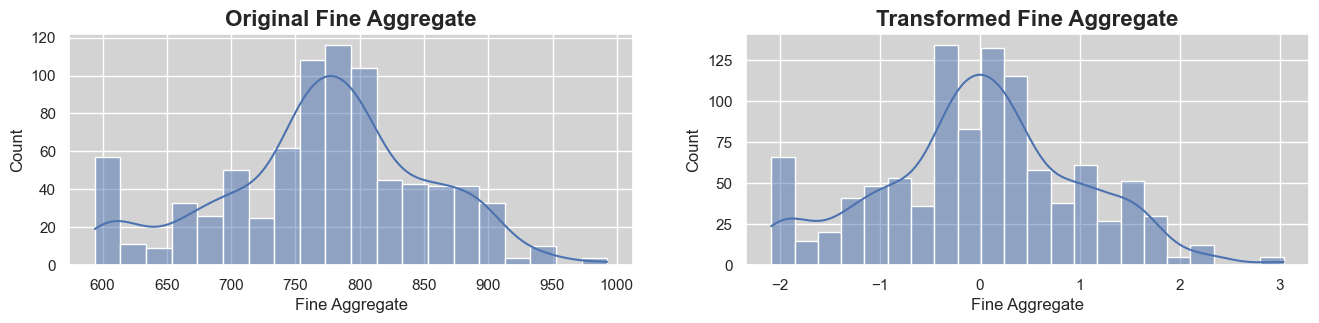

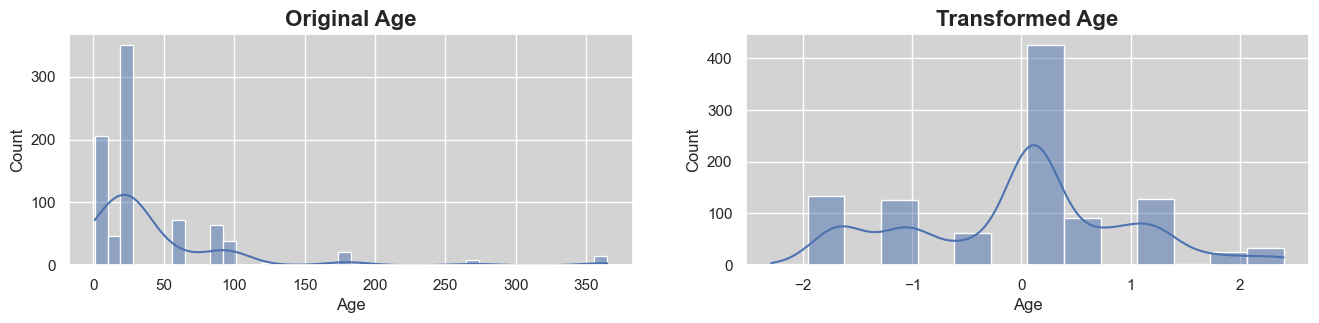

In [169]:
for col in x_train_transform.columns:
    plt.figure(figsize=(16, 3))
    
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(f'Original {col}')
    plt.grid(True)
    
    plt.subplot(122)
    sns.histplot(x_train_transform[col], kde=True)
    plt.title(f'Transformed {col}')
    plt.grid(True)
    
    plt.show()

**Observation**:
- Yeo-Johnson normalization performed slightly better than Box-Cox in terms of results. 📈
- Features like **Age** and **Super Plasticizer** showed clear transformations from non-normal to normal distributions. 📊

---

In [170]:
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885


In [172]:
results = ["Test No Transformation", "Test CV", "Test Box Cox", "CV Box Cox", "Test Yeo John", "CV Yeo John"]
predStateDF = pd.DataFrame({"Data Set " : results, 
                            "Output": pred_stats})
predStateDF.head()

,Data Set,Output
0,Test No Transformation,0.627553
1,Test CV,0.460994
2,Test Box Cox,0.805532
3,CV Box Cox,0.665854
4,Test Yeo John,0.816191


#### 📝 Conclusion:
Using **Box-Cox** and **Yeo-Johnson** transformations on our training dataset, we were able to normalize many input features. ✨

#### Features Normalized:
1. **Age**
2. **Super Plasticizer**

This helped us achieve better accuracy in our model.

**Observation**: Yeo-Johnson normalization performed slightly better than Box-Cox We can see this in the above Pred Stats Data frame that we hae just created. 📈